# Solar Farm Project

## Import Required Modules

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Converting Data into Useable Formatting

In [15]:
from data_loader import convert_tsf_to_dataframe
loaded_data, frequency, forecast_horizon, contain_missing_values, contain_equal_length = convert_tsf_to_dataframe('phase_1_data.tsf')
loaded_data.head()

,series_name,start_timestamp,series_value
0,Building0,2016-07-03 21:30:00,"[283.8, 283.8, 283.8, 606.0, 606.0, 606.0, 606..."
1,Building1,2019-01-09 23:15:00,"[8.1, 15.7, 22.8, 32.7, 8.1, 16.5, 24.7, 34.5,..."
2,Building3,2016-03-01 04:15:00,"[1321.0, 1321.0, 1321.0, 1321.0, 1293.0, 1293...."
3,Building4,2019-07-03 04:45:00,"[2.0, NaN, 1.0, 2.0, NaN, 2.0, NaN, NaN, 2.0, ..."
4,Building5,2019-07-25 23:00:00,"[30.0, 31.0, 24.0, 34.0, 30.0, 31.0, 26.0, 33...."


In [60]:
demand_df = pd.DataFrame()
for i in range(len(loaded_data)):
    demand_df[loaded_data['series_name'][i]] = pd.Series(data=list(loaded_data['series_value'][i]), 
                                                    index=pd.date_range(loaded_data['start_timestamp'][i], 
                                                    periods=len(loaded_data['series_value'][i]), 
                                                    freq="15min")).astype(float)
demand_df.index.names = ['Date']
demand_df.head()

,Building0,Building1,Building3,Building4,Building5,Building6,Solar0,Solar1,Solar2,Solar3,Solar4,Solar5
Date,,,,,,,,,,,,
2016-07-03 21:30:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-03 21:45:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-03 22:00:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-03 22:15:00,606.0,NaN,624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-03 22:30:00,606.0,NaN,624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
olympic_max_temp = pd.read_csv('weather_data/IDCJAC0010_86338_1800_Data.csv', parse_dates={'Date': ['Year', 'Month', 'Day']})
olympic_max_temp.head()

,Date,Product code,Bureau of Meteorology station number,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,2013-01-01,IDCJAC0010,86338,NaN,NaN,NaN
1,2013-01-02,IDCJAC0010,86338,NaN,NaN,NaN
2,2013-01-03,IDCJAC0010,86338,NaN,NaN,NaN
3,2013-01-04,IDCJAC0010,86338,NaN,NaN,NaN
4,2013-01-05,IDCJAC0010,86338,NaN,NaN,NaN


In [18]:
olympic_max_temp = pd.read_csv('weather_data/IDCJAC0010_86338_1800_Data.csv', parse_dates={'Date': ['Year', 'Month', 'Day']})
olympic_max_temp.index = olympic_max_temp['Date']

moorabbin_max_temp = pd.read_csv('weather_data/IDCJAC0010_86077_1800_Data.csv', parse_dates={'Date': ['Year', 'Month', 'Day']})
moorabbin_max_temp.index = moorabbin_max_temp['Date']

olympic_min_temp = pd.read_csv('weather_data/IDCJAC0011_86338_1800_Data.csv', parse_dates={'Date': ['Year', 'Month', 'Day']})
olympic_min_temp.index = olympic_min_temp['Date']

moorabbin_min_temp = pd.read_csv('weather_data/IDCJAC0011_86077_1800_Data.csv', parse_dates={'Date': ['Year', 'Month', 'Day']})
moorabbin_min_temp.index = moorabbin_min_temp['Date']

olympic_rain = pd.read_csv('weather_data/IDCJAC0009_86338_1800_Data.csv', parse_dates={'Date': ['Year', 'Month', 'Day']})
olympic_rain.index = olympic_rain['Date']

oakleigh_rain = pd.read_csv('weather_data/IDCJAC0009_86088_1800_Data.csv', parse_dates={'Date': ['Year', 'Month', 'Day']})
oakleigh_rain.index = oakleigh_rain['Date']

moorabbin_rain = pd.read_csv('weather_data/IDCJAC0009_86077_1800_Data.csv', parse_dates={'Date': ['Year', 'Month', 'Day']})
moorabbin_rain.index = moorabbin_rain['Date']

olympic_solar = pd.read_csv('weather_data/IDCJAC0016_86338_1800_Data.csv', parse_dates={'Date': ['Year', 'Month', 'Day']})
olympic_solar.index = olympic_solar['Date']

oakleigh_solar = pd.read_csv('weather_data/IDCJAC0016_86088_1800_Data.csv', parse_dates={'Date': ['Year', 'Month', 'Day']})
oakleigh_solar.index = oakleigh_solar['Date']

moorabbin_solar = pd.read_csv('weather_data/IDCJAC0016_86077_1800_Data.csv', parse_dates={'Date': ['Year', 'Month', 'Day']})
moorabbin_solar.index = moorabbin_solar['Date']

In [19]:
weather_df = pd.DataFrame()
weather_df['olympic_max_temp'] = olympic_max_temp['Maximum temperature (Degree C)']
weather_df['moorabbin_max_temp'] = moorabbin_max_temp['Maximum temperature (Degree C)']
weather_df['olympic_min_temp'] = olympic_min_temp['Minimum temperature (Degree C)']
weather_df['moorabbin_min_temp'] = moorabbin_min_temp['Minimum temperature (Degree C)']
weather_df['olympic_rain'] = olympic_rain['Rainfall amount (millimetres)']
weather_df['oakleigh_rain'] = oakleigh_rain['Rainfall amount (millimetres)']
weather_df['moorabbin_rain'] = moorabbin_rain['Rainfall amount (millimetres)']
weather_df['olympic_solar'] = olympic_solar['Daily global solar exposure (MJ/m*m)']
weather_df['oakleigh_solar'] = oakleigh_solar['Daily global solar exposure (MJ/m*m)']
weather_df['moorabbin_solar'] = moorabbin_solar['Daily global solar exposure (MJ/m*m)']
weather_df.head()

,olympic_max_temp,moorabbin_max_temp,olympic_min_temp,moorabbin_min_temp,olympic_rain,oakleigh_rain,moorabbin_rain,olympic_solar,oakleigh_solar,moorabbin_solar
Date,,,,,,,,,,
2013-01-01,NaN,22.8,NaN,13.3,NaN,0.0,0.0,31.1,30.5,29.4
2013-01-02,NaN,20.5,NaN,12.6,NaN,0.0,0.0,31.9,32.8,33.0
2013-01-03,NaN,36.5,NaN,12.0,NaN,0.0,0.0,32.8,32.2,31.9
2013-01-04,NaN,41.5,NaN,18.6,NaN,0.0,0.0,33.5,33.6,33.6
2013-01-05,NaN,26.2,NaN,18.8,NaN,0.0,0.0,30.5,31.4,29.6


In [20]:
price_df = pd.read_csv('PRICE_AND_DEMAND_202010_VIC1.csv')
price_df['Date'] = pd.to_datetime(price_df['SETTLEMENTDATE'], format="%Y/%m/%d %H:%M:%S")
price_df.index = price_df['Date']
price_df.drop(labels=['REGION', 'SETTLEMENTDATE', 'PERIODTYPE', 'Date'], axis=1)

,TOTALDEMAND,RRP
Date,,
2020-10-01 00:30:00,4670.40,39.09
2020-10-01 01:00:00,4513.84,38.39
2020-10-01 01:30:00,4329.71,36.46
2020-10-01 02:00:00,4146.21,35.79
2020-10-01 02:30:00,4003.90,33.65
...,...,...
2020-10-31 22:00:00,4371.16,44.13
2020-10-31 22:30:00,4231.38,45.91
2020-10-31 23:00:00,4200.92,44.14


## Data Visualisation

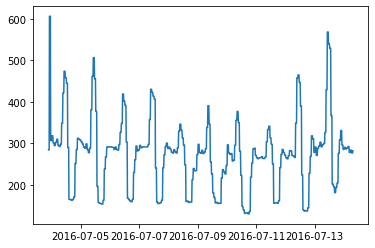

In [65]:
plt.plot(demand_df[0:1000].index, demand_df['Building0'][0:1000])

In [ ]:
plt.plot()